<a href="https://colab.research.google.com/github/daomanhcuonghust/Deep-Learning---ProtonX/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt


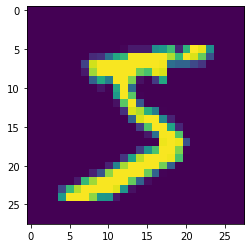

In [ ]:
plt.imshow(training_images[0])

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
training_labels[0]

5

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
training_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
training_images = training_images/255.0
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)


In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()
training_labels = lb.fit_transform(training_labels)
test_labels = lb.fit_transform(test_labels)

In [ ]:
model = Sequential()

In [ ]:
shape = (28, 28, 1)

In [ ]:
model.add(Conv2D(32, (3,3), input_shape = shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128))

In [ ]:
model.add(Activation("relu"))


In [ ]:
model.add(BatchNormalization())


In [ ]:
model.add(Dense(10))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0

In [ ]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"] )

In [ ]:
model.fit(x= training_images, y= training_labels,batch_size=64, epochs=10, verbose=1, validation_data=(test_images,test_labels))

Epoch 1/10
938/938 [==============================] - 41s 43ms/step - loss: 0.2359 - accuracy: 0.9306 - val_loss: 0.0547 - val_accuracy: 0.9837
Epoch 2/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0472 - accuracy: 0.9862 - val_loss: 0.0507 - val_accuracy: 0.9841
Epoch 3/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0269 - accuracy: 0.9924 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 4/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0165 - accuracy: 0.9959 - val_loss: 0.0383 - val_accuracy: 0.9875
Epoch 5/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0102 - accuracy: 0.9981 - val_loss: 0.0351 - val_accuracy: 0.9892
Epoch 6/10
938/938 [==============================] - 40s 43ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0359 - val_accuracy: 0.9885
Epoch 7/10
938/938 [==============================] - 40s 42ms/step - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.0387 - val_accuracy:

In [ ]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()


In [ ]:
training_images = training_images/255.0
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)


In [ ]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['acc'])

In [ ]:
model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0721 - acc: 0.9779 - val_loss: 0.0555 - val_acc: 0.9842
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0315 - acc: 0.9900 - val_loss: 0.0632 - val_acc: 0.9811
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0192 - acc: 0.9936 - val_loss: 0.0471 - val_acc: 0.9864
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0156 - acc: 0.9948 - val_loss: 0.0418 - val_acc: 0.9875
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0125 - acc: 0.9960 - val_loss: 0.0461 - val_acc: 0.9873
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0107 - acc: 0.9965 - val_loss: 0.0432 - val_acc: 0.9879
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0079 - acc: 0.9971 - val_loss: 0.0510 - val_acc: 0.9868
Epoch 8/10
1875/1875 [==========================

In [ ]:
!pip3 install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=763147490465abb741931abb541f91383f56bc1208ce8e7b358d437251d331ec
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import cv2

In [ ]:
wget.download('https://programmer.ink/images/think/c080fb939e166165e5f25d63cbf0e86e.jpg')

'c080fb939e166165e5f25d63cbf0e86e.jpg'

In [ ]:
img1 = cv2.imread('c080fb939e166165e5f25d63cbf0e86e.jpg')

In [ ]:
img1.shape

(333, 333, 3)

In [ ]:
img1= img1.reshape(28,28,1)

ValueError: ignored

In [ ]:
test_images = test_images.reshape(10000, 28, 28,1)

TypeError: ignored

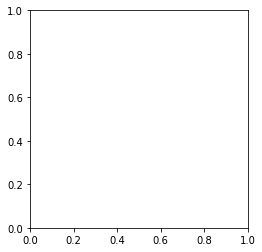

In [ ]:
plt.imshow(test_images[6])
plt.show()

In [ ]:
res = model.predict(test_images[6:7])

In [ ]:
import numpy as np


In [ ]:
np.argmax(res)

4